## Problem Fromation
1. **In this example, we want to investigate "what factors/variables affect the performance of revenue"**
2. **Our aim is to go back to the business and make suggestions about how to generate more revenue**
3. **Make Revenue predictions given specific variable values Hence our Dependent variable (y) is Revenue**

<p style="font-family: Arial; font-size:1.5em;color:Blue;"> Installing Packages </p>

In [3]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt


<p style="font-family: Arial; font-size:1.4em;color:Blue;"> Converting .txt to .csv </p>

In [4]:
#read_file = pd.read_csv (r'C:\Users\96653\Desktop\python project\Liner Regression Analysis\Marketing Raw Data.txt')
#read_file.to_csv (r'C:\Users\96653\Desktop\python project\Liner Regression Analysis\New_Raw_Data.csv', index=None)


<p style="font-family: Arial; font-size:1.4em;color:Blue;"> Loading data </p>

In [5]:
raw_data=pd.read_csv(r'C:\Users\96653\Desktop\python project\Liner Regression Analysis\New_Raw_Data.csv')

<p style="font-family: Arial; font-size:1.4em;color:purple;"> Shape of Data </p>

In [6]:
print(raw_data.shape)

(185, 11)


In [7]:
raw_data

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46.0,34.0,11.0,11.0,2020.0,Monday,707.0,465.0,651.375,No Promo
1,10/11/2020,46.0,34.0,11.0,11.0,2020.0,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,11/11/2020,46.0,34.0,11.0,11.0,2020.0,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,12/11/2020,46.0,34.0,11.0,11.0,2020.0,Thursday,1726.0,11712.0,1801.750,No Promo
4,13/11/2020,46.0,34.0,11.0,11.0,2020.0,Friday,2134.0,10000.0,2614.500,No Promo
...,...,...,...,...,...,...,...,...,...,...,...
180,08/05/2021,19.0,60.0,5.0,17.0,2021.0,Saturday,1483.0,5927.0,1121.875,No Promo
181,09/05/2021,20.0,61.0,5.0,17.0,2021.0,Sunday,1303.0,3861.0,871.000,No Promo
182,10/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,11/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Running 5 rows
raw_data.head()

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46.0,34.0,11.0,11.0,2020.0,Monday,707.0,465.0,651.375,No Promo
1,10/11/2020,46.0,34.0,11.0,11.0,2020.0,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,11/11/2020,46.0,34.0,11.0,11.0,2020.0,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,12/11/2020,46.0,34.0,11.0,11.0,2020.0,Thursday,1726.0,11712.0,1801.750,No Promo
4,13/11/2020,46.0,34.0,11.0,11.0,2020.0,Friday,2134.0,10000.0,2614.500,No Promo


# Data Preprocessing
### * ***Explotary Data Analysis***

In [9]:
#Checking for null values
raw_data.isnull().sum()
#Summarizing---How many null/missing values by coloumn

Date               0
Week               3
Week_ID            3
Month              3
Month_ID           3
Year               3
Day_Name           3
Visitors           3
Revenue            3
Marketing Spend    3
Promo              3
dtype: int64

#### Visualizing Missing Values

In [10]:
raw_data[raw_data['Week'].isnull()]

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
182,10/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,11/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,12/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p style="font-family: Arial; font-size:1em;color:Red;">Ways of dealling with Missing Data </p>

1. **Delete the whole observation if all the coloumns are null e.g(here)**
2. **Replace the NULL value with another value (mean, rolling mean, last day value, closest day value, mode, median, zero, etc) if only one or two coloumns are missing**

In [11]:
#Deleting null values

raw_data.dropna()

#it drops all observation that has any values are null. 

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46.0,34.0,11.0,11.0,2020.0,Monday,707.0,465.0,651.375000,No Promo
1,10/11/2020,46.0,34.0,11.0,11.0,2020.0,Tuesday,1455.0,10386.0,1298.250000,Promotion Red
2,11/11/2020,46.0,34.0,11.0,11.0,2020.0,Wednesday,1520.0,12475.0,1559.375000,Promotion Blue
3,12/11/2020,46.0,34.0,11.0,11.0,2020.0,Thursday,1726.0,11712.0,1801.750000,No Promo
4,13/11/2020,46.0,34.0,11.0,11.0,2020.0,Friday,2134.0,10000.0,2614.500000,No Promo
...,...,...,...,...,...,...,...,...,...,...,...
177,05/05/2021,19.0,60.0,5.0,17.0,2021.0,Wednesday,1400.0,7284.0,1119.600000,No Promo
178,06/05/2021,19.0,60.0,5.0,17.0,2021.0,Thursday,2244.0,13021.0,2067.888889,Promotion Red
179,07/05/2021,19.0,60.0,5.0,17.0,2021.0,Friday,2023.0,4587.0,1450.200000,No Promo
180,08/05/2021,19.0,60.0,5.0,17.0,2021.0,Saturday,1483.0,5927.0,1121.875000,No Promo


In [12]:
# For deleting specific column null values

raw_data = raw_data.dropna(subset = ['Week'])

# printing the shape

raw_data

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46.0,34.0,11.0,11.0,2020.0,Monday,707.0,465.0,651.375000,No Promo
1,10/11/2020,46.0,34.0,11.0,11.0,2020.0,Tuesday,1455.0,10386.0,1298.250000,Promotion Red
2,11/11/2020,46.0,34.0,11.0,11.0,2020.0,Wednesday,1520.0,12475.0,1559.375000,Promotion Blue
3,12/11/2020,46.0,34.0,11.0,11.0,2020.0,Thursday,1726.0,11712.0,1801.750000,No Promo
4,13/11/2020,46.0,34.0,11.0,11.0,2020.0,Friday,2134.0,10000.0,2614.500000,No Promo
...,...,...,...,...,...,...,...,...,...,...,...
177,05/05/2021,19.0,60.0,5.0,17.0,2021.0,Wednesday,1400.0,7284.0,1119.600000,No Promo
178,06/05/2021,19.0,60.0,5.0,17.0,2021.0,Thursday,2244.0,13021.0,2067.888889,Promotion Red
179,07/05/2021,19.0,60.0,5.0,17.0,2021.0,Friday,2023.0,4587.0,1450.200000,No Promo
180,08/05/2021,19.0,60.0,5.0,17.0,2021.0,Saturday,1483.0,5927.0,1121.875000,No Promo


In [13]:
# Visualizing null observation after dropping
raw_data.isnull().sum()

Date               0
Week               0
Week_ID            0
Month              0
Month_ID           0
Year               0
Day_Name           0
Visitors           0
Revenue            0
Marketing Spend    0
Promo              0
dtype: int64

<p style="font-family: Arial; font-size:1.4em;color:Red;"> Investigate all the elements whithin each Feature </p>

In [14]:
#np.unique find unique values from each coloumn 

for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Date :182
The number of values for feature Week :28
The number of values for feature Week_ID :28
The number of values for feature Month :7 -- [ 1.  2.  3.  4.  5. 11. 12.]
The number of values for feature Month_ID :7 -- [11. 12. 13. 14. 15. 16. 17.]
The number of values for feature Year :2 -- [2020. 2021.]
The number of values for feature Day_Name :7 -- ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
The number of values for feature Visitors :175
The number of values for feature Revenue :181
The number of values for feature Marketing Spend :182
The number of values for feature Promo :3 -- ['No Promo' 'Promotion Blue' 'Promotion Red']


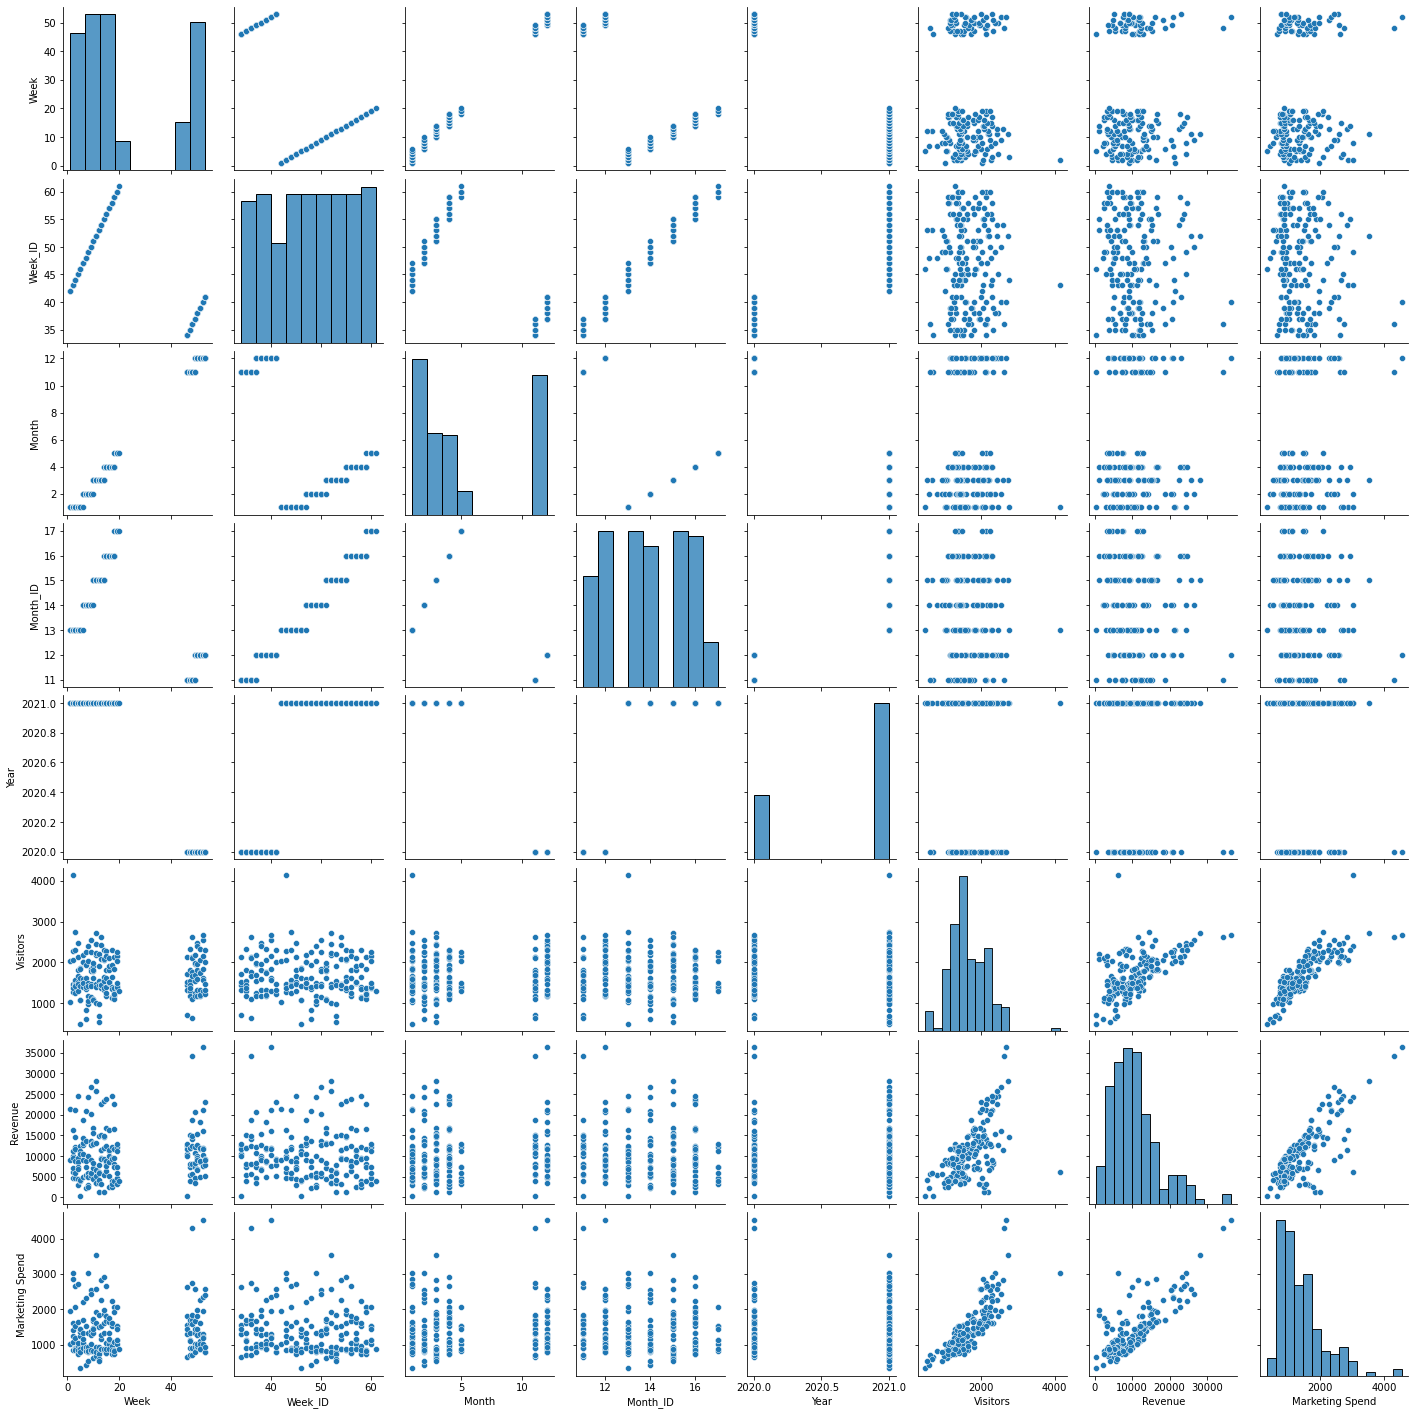

In [15]:
# Visualize the data using seaborn Pairplots

g = sns.pairplot(raw_data)

# Notes: Do not run this on a big dataset. Filter the columns first

In [16]:
raw_data.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

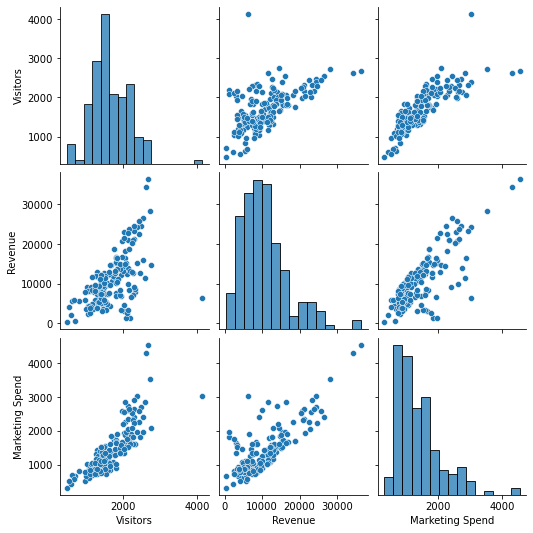

In [17]:
# Visualising a Subset of our data

g = sns.pairplot(raw_data[['Visitors', 'Revenue', 'Marketing Spend']])

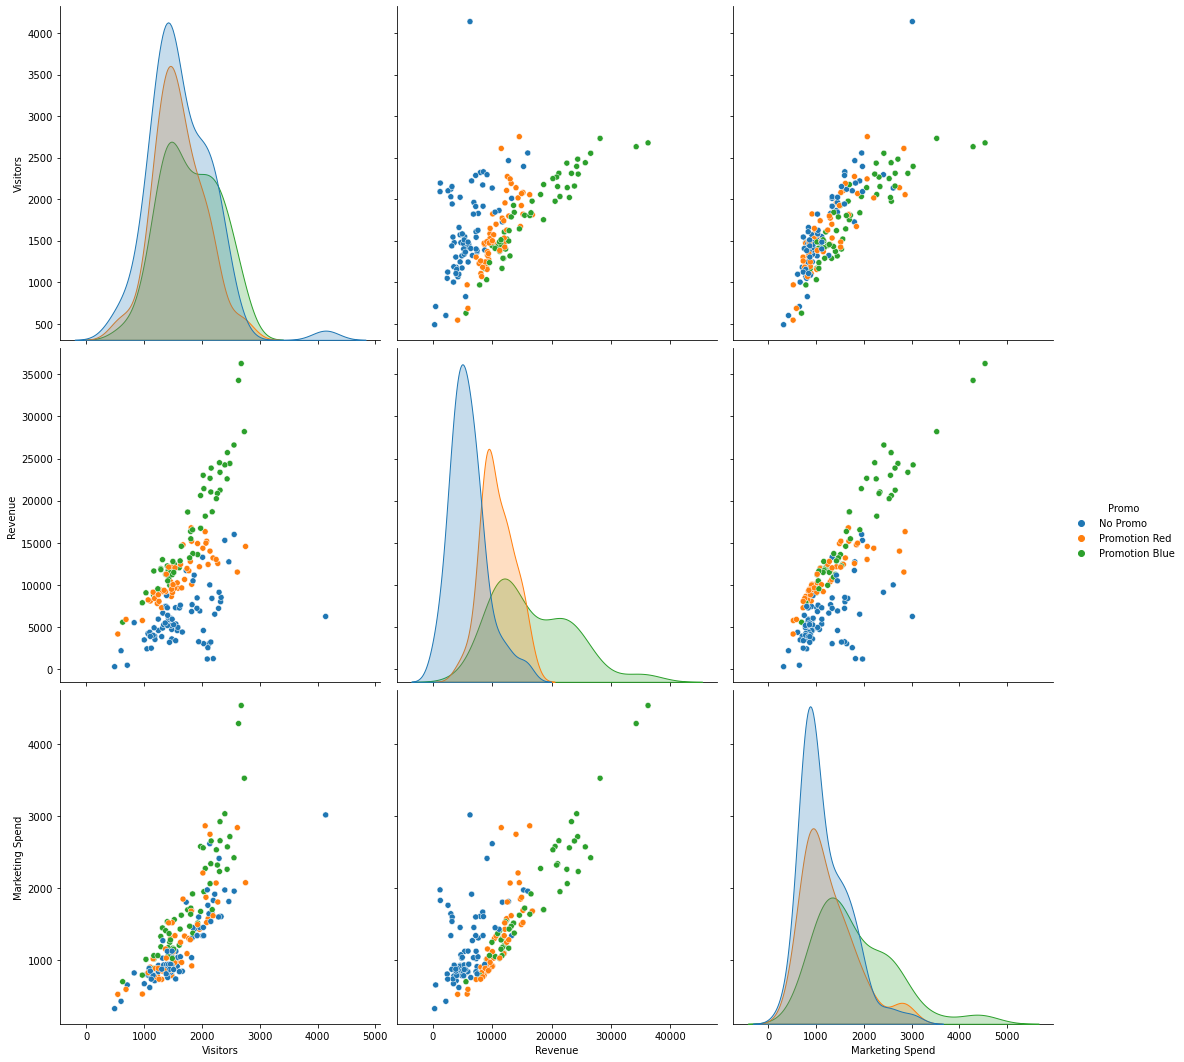

In [18]:
# Visualising important features

g = sns.pairplot(raw_data[['Visitors', 'Revenue', 'Marketing Spend', 'Promo']], hue = 'Promo', height = 5)

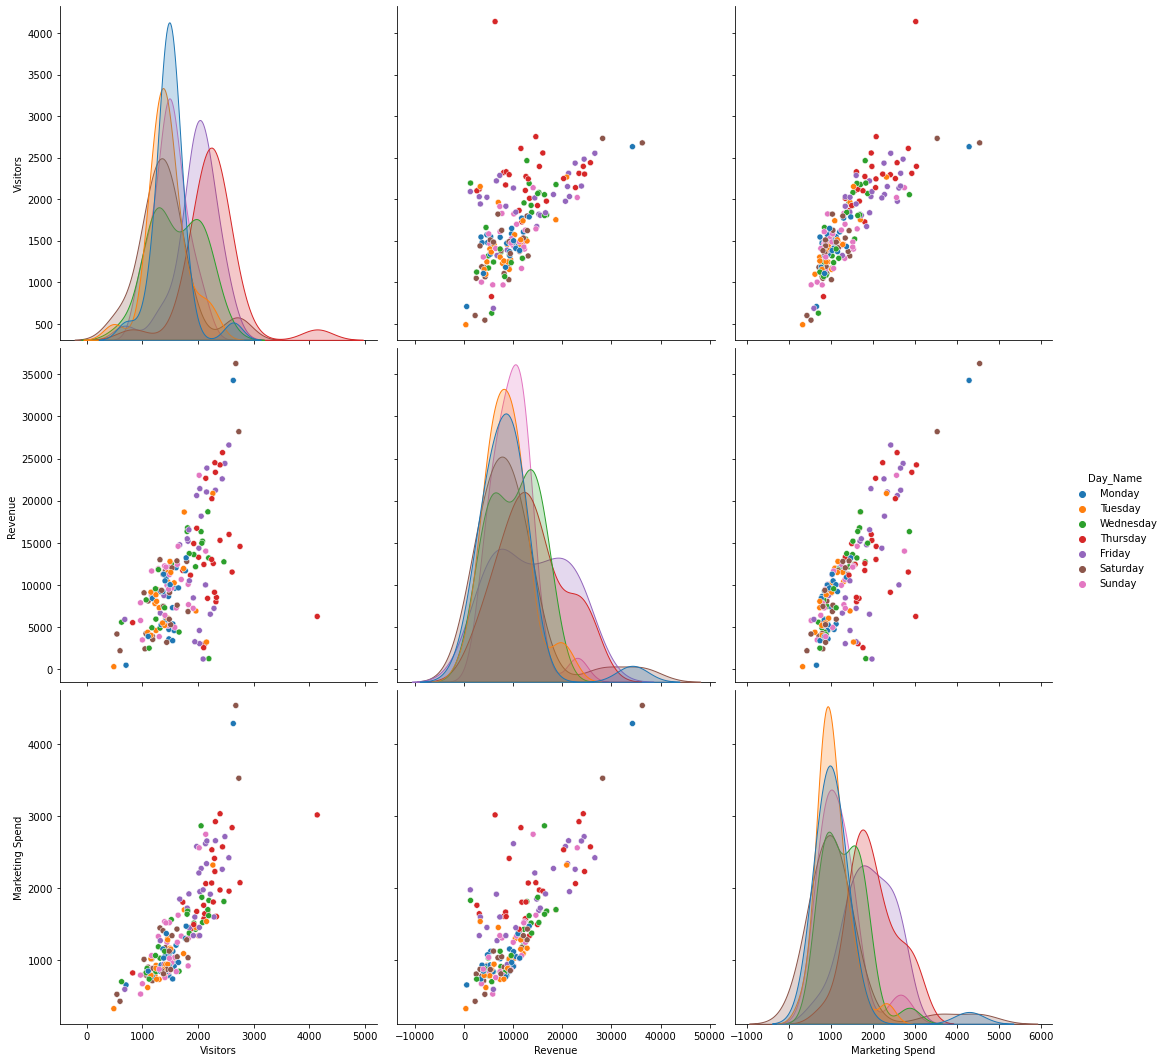

In [19]:
# Visualising a Subset of our data - important features

g = sns.pairplot(raw_data[['Visitors', 'Revenue', 'Marketing Spend', 'Day_Name']], hue = 'Day_Name', height = 5)

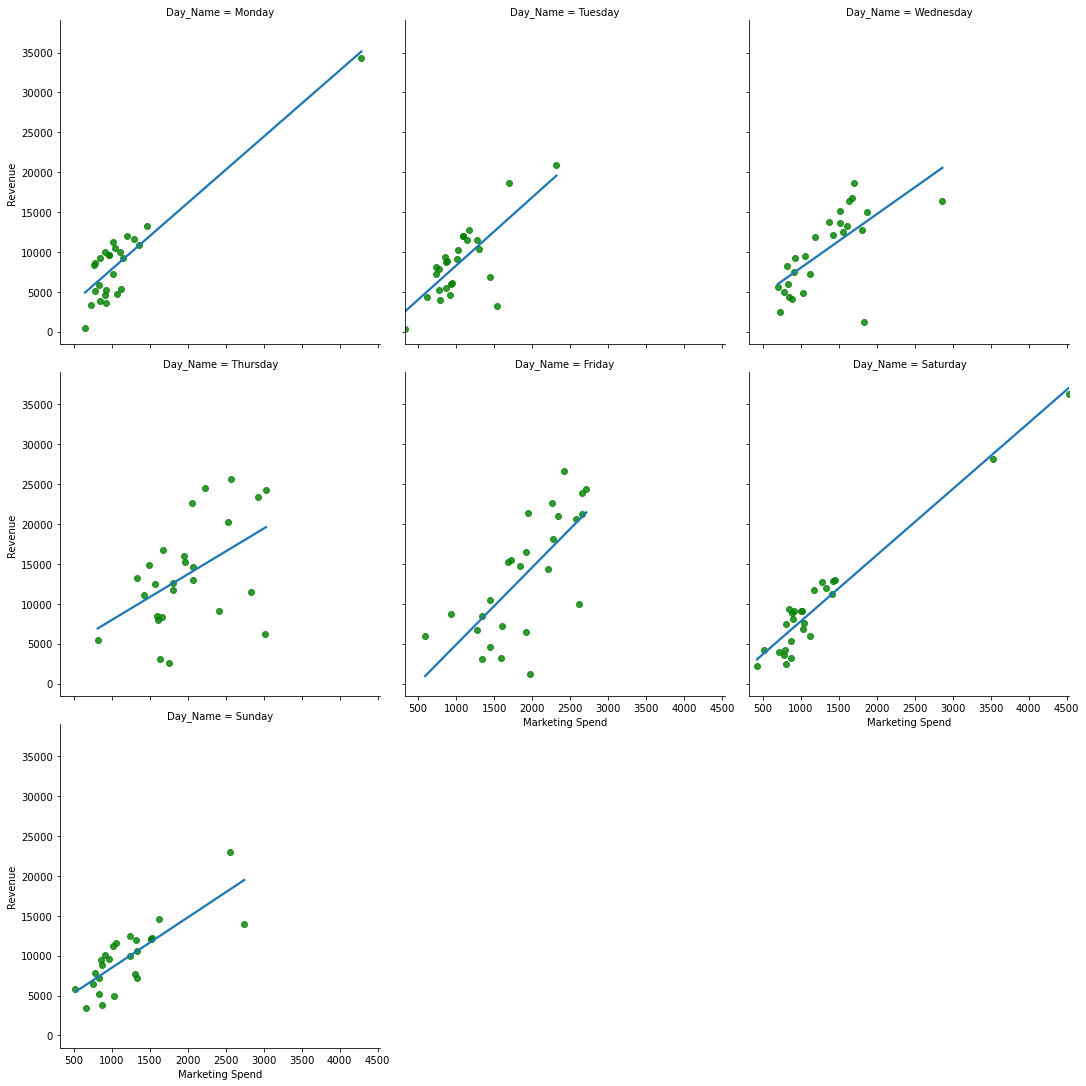

In [20]:
#we will subplot for checking revenue with marketing speed per day
g = sns.lmplot(x = 'Marketing Spend', y = 'Revenue', data = raw_data, col = 'Day_Name', col_wrap = 3, height = 5, 
              scatter_kws = {'color':'green'}, ci = False)

*** Every single day it is showing reletionship between marketing spend with revenue, so have to keep date in data, so we 
have to convert it into numeric representation 0/1***

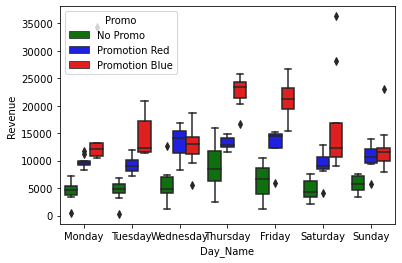

In [21]:
# Investigate the distribution of Revenue by Categorical Variables

pal = ['green', 'blue','red']
g = sns.boxplot(x = 'Day_Name', y = 'Revenue', data = raw_data, hue = 'Promo',palette = pal)


** Using box plot we can see that there are some outliers , we want to remove that outliers**

## Data Cleaning

In [22]:
raw_data[raw_data['Revenue'] > 27000]

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
14,23/11/2020,48.0,36.0,11.0,11.0,2020.0,Monday,2632.0,34278.0,4284.750,Promotion Blue
47,26/12/2020,52.0,40.0,12.0,12.0,2020.0,Saturday,2678.0,36283.0,4535.375,Promotion Blue
124,13/03/2021,11.0,52.0,3.0,15.0,2021.0,Saturday,2732.0,28196.0,3524.500,Promotion Blue


#### Deleting outliers

In [23]:
# we will take all the data excepting above

raw_data = raw_data[raw_data['Revenue'] < 27000]

raw_data.shape

(179, 11)

In [24]:
# Column names
raw_data.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

#### Selecting Columns

In [25]:
# we will Select usefull only columns 
raw_data = raw_data[['Day_Name','Visitors', 'Revenue', 'Marketing Spend', 'Promo']]

#visualize the raw data
raw_data.head(10)

,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,Monday,707.0,465.0,651.375000,No Promo
1,Tuesday,1455.0,10386.0,1298.250000,Promotion Red
2,Wednesday,1520.0,12475.0,1559.375000,Promotion Blue
3,Thursday,1726.0,11712.0,1801.750000,No Promo
4,Friday,2134.0,10000.0,2614.500000,No Promo
5,Saturday,1316.0,12996.0,1444.000000,Promotion Blue
6,Sunday,1287.0,11929.0,1325.444444,Promotion Blue
7,Monday,1548.0,5359.0,1119.111111,No Promo
8,Tuesday,1448.0,12016.0,1092.363636,Promotion Blue
9,Wednesday,1362.0,7441.0,906.700000,No Promo


###  Converting Categorical data into Numerical Value 

In [26]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data, columns = ['Promo', 'Day_Name'])

# Visualizing the data
new_raw_data.head()

,Visitors,Revenue,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,707.0,465.0,651.375,1,0,0,0,1,0,0,0,0,0
1,1455.0,10386.0,1298.250,0,0,1,0,0,0,0,0,1,0
2,1520.0,12475.0,1559.375,0,1,0,0,0,0,0,0,0,1
3,1726.0,11712.0,1801.750,1,0,0,0,0,0,0,1,0,0
4,2134.0,10000.0,2614.500,1,0,0,1,0,0,0,0,0,0


# Feature Selection

<p >In this example, we do not have many variables so we should use all of the data but in some cases, you have thousands of variables and you will need to filter them in order to save computational time.</p>

  Two ways to help us select the important features are:
1. Correlation
2. Feature Importance
   

In [27]:
# Running Correlation

hm = new_raw_data[['Visitors','Revenue','Marketing Spend']].corr()
hm

,Visitors,Revenue,Marketing Spend
Visitors,1.000000,0.531602,0.837313
Revenue,0.531602,1.000000,0.725675
Marketing Spend,0.837313,0.725675,1.000000


#### Notes

<p>
   1. corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded <br>
   2. The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease <br>
   3. 0.8 +- is Strong Correlation, 0.6 to 0.8 +- is moderate Correlation & the other values, there is no correlation</p>

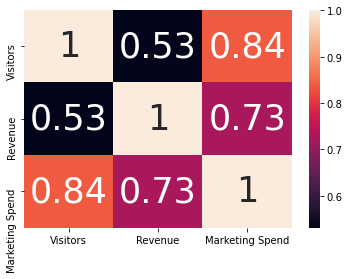

In [28]:
# Visualizing Correlation with a Heatmap

g = sns.heatmap(hm, annot = True, annot_kws={'size':35})

#### Steps of Running Feature Importance

1. Split the data into X & y
2. Run a Tree-based estimators (i.e. decision trees & random forests)
3. Run Feature Importance

In [29]:
# X will be Independent variable everything except Revenue
# Y is Dependent Variable, Revenue

X2 = new_raw_data.drop('Revenue', axis = 1)

# if we want to pass data in algorithm we have to turn x into values

X = new_raw_data.drop('Revenue', axis = 1).values

y = new_raw_data['Revenue']

print(X.shape)
print(y.shape)

(179, 12)
(179,)


In [30]:
X2

,Visitors,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,707.0,651.375000,1,0,0,0,1,0,0,0,0,0
1,1455.0,1298.250000,0,0,1,0,0,0,0,0,1,0
2,1520.0,1559.375000,0,1,0,0,0,0,0,0,0,1
3,1726.0,1801.750000,1,0,0,0,0,0,0,1,0,0
4,2134.0,2614.500000,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
177,1400.0,1119.600000,1,0,0,0,0,0,0,0,0,1
178,2244.0,2067.888889,0,0,1,0,0,0,0,1,0,0
179,2023.0,1450.200000,1,0,0,1,0,0,0,0,0,0
180,1483.0,1121.875000,1,0,0,0,0,1,0,0,0,0


In [31]:
y

0        465.0
1      10386.0
2      12475.0
3      11712.0
4      10000.0
        ...   
177     7284.0
178    13021.0
179     4587.0
180     5927.0
181     3861.0
Name: Revenue, Length: 179, dtype: float64

In [32]:
X

array([[7.070000e+02, 6.513750e+02, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.455000e+03, 1.298250e+03, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [1.520000e+03, 1.559375e+03, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       ...,
       [2.023000e+03, 1.450200e+03, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.483000e+03, 1.121875e+03, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.303000e+03, 8.710000e+02, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [33]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

#### Notes: 
<p> The importance of a feature is calculated as the (normalized) total reduction of entropy (other criterions too) brought by that feature or the higher information gain.</p>

In [34]:
# Running Feature Importance

for i, column in enumerate(new_raw_data.drop('Revenue', axis = 1)):
    print('The feature importance for {} is: {:.3f}'.format(column, dt.feature_importances_[i]))

The feature importance for Visitors is: 0.332
The feature importance for Marketing Spend is: 0.438
The feature importance for Promo_No Promo is: 0.032
The feature importance for Promo_Promotion Blue is: 0.047
The feature importance for Promo_Promotion Red is: 0.045
The feature importance for Day_Name_Friday is: 0.013
The feature importance for Day_Name_Monday is: 0.014
The feature importance for Day_Name_Saturday is: 0.013
The feature importance for Day_Name_Sunday is: 0.016
The feature importance for Day_Name_Thursday is: 0.020
The feature importance for Day_Name_Tuesday is: 0.017
The feature importance for Day_Name_Wednesday is: 0.013


<p>Most important feature here is Marketing Spend -> Visitors-> Promo Blue-> Thursday</p>

#### Notes:

<p> Our data is fine so .. </p>

1.  we have not normalised / scale our data
2.  we have not done any feature engineering - created new features
3.  we have not joined multiple datasets together
4.  we have not aggregated any of our data

## Splitting the Raw Data - Hold-out validation

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(143, 12)
(36, 12)
(143,)
(36,)


> ### What is Linear Regression Analysis

- Linear regression is a widely used machine learning model that predicts continues numbers as outputs; not classes
- It models the relationship of 2 plus variables by fitting a linear equation to observed data
- In linear regression you have 1 dependent variable (y) and 1 plus independent variables (X)
- Before you attempt to model the data, you should check if there is a relationship between the variables first; a good way is to use a scatterplot to visualise the data

 ### Running Linear Regression <hr>

In [36]:
# Training the Regression

lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)

# SK-Learn official doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [37]:
# Actiaal Values
y_train

73      3021.0
32      6654.0
141     5478.0
154    10027.0
122    25704.0
        ...   
159     5274.0
131     4169.0
121    13201.0
136    11524.0
143    23368.0
Name: Revenue, Length: 143, dtype: float64

In [38]:
# Predicted values
y_pred



array([ 8705.50803238,  6472.17869274,  4440.32746821,  9854.13421815,
       20470.49081201, 13259.20147968, 13412.43936843, 19071.25323458,
        1011.80212161, 20962.47300197,  4753.61288693, 13648.41721974,
       13374.77268825, 20422.87899345,  8853.79300499,  8916.13289802,
       13498.94148289,  6205.52346237,  8286.46917634, 16700.31444964,
       19236.89110222,  2507.01947954,  9022.95702143, 20585.16837547,
       10157.53082079,  3629.09878399, 15744.20305379,  4665.32195611,
       15487.29412778,  9371.6680232 , 10657.85245056, 17391.63379279,
        7356.21819439,  3764.06039853,  4311.99089777, 13112.10851617,
        3605.07141122, 13380.08175878, 11521.68147579,  7416.01143452,
        7660.84372446, 10797.8869771 ,  8353.41108964, 15286.88903789,
       20134.1178417 ,  2802.64541887,  9446.08236768, 12611.79941142,
        9506.08359716, 14949.57797928, 12301.04535283,  4146.95924223,
       11605.50687406, 12673.508552  , 15904.41280179,  2849.35768349,
      

In [39]:
y_pred.shape

(143,)

<b> We want prediced y_train of X_train so that we can evaluate our model.

### Evaluating the Model <hr>

In [40]:
# Model Accuracy on training dataset

print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print("")
print('The Accuracy R^2  on the training dataset is: ',r2_score(y_train,y_pred) )   
print("")

The Accuracy  on the training dataset is:  0.791949990505602

The Accuracy R^2  on the training dataset is:  0.791949990505602



In [41]:
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test) )

print("")


The Accuracy  on the testing dataset is:  0.751190386538668



#### Notes:

- The accuracy score represents the coefficient of determination ( 𝑅2 ). This is at max 1, but can be negative. It will be 0 if you predict the mean of y for all observations.

- The R Square is measure of how close the data are to the fitted regression line.

- In this case we can say that our model explains 79% of the training data & 75% of the testing data

- The RMSE is the standard deviation of the residuals. Residuals is the difference between the predicted value and the regression line. Hence RMSE is a measure of how spread your residuals are.

- The mean absolute error (MAE) is the average of all the absolute errors. The absolute error is the difference between the true value (y_train) and the predicted value (y_pred).

- Coeff are the weights

- The intercept is the expected mean value of Y when all X=0

In [42]:
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred))) #training data set
print("")
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test)))) #testing dataset

print("")

The RMSE  on the training dataset is:  2618.561282656437

The RMSE  on the testing dataset is:  2340.4200873490113



<hr> <b>Links <br> R2 Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html <br>
RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html <br>
MAE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html <hr>

In [43]:
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print("")
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))


print("")

The MAE  on the training dataset is:  1928.0670665528867

The MAE  on the testing dataset is:  1692.3835577162286



*Error is dropped for unseen data*

In [44]:
# Coefficients
print('Coefficients: ', lm.coef_ )


Coefficients:  [ 9.72168996e-01  3.69561477e+00 -4.29587654e+03  3.72469059e+03
  5.71185949e+02  7.38005738e+02 -3.52308895e+02 -9.02241594e+02
 -1.55867567e+02  8.14821481e+02  1.50084913e+02 -2.92494076e+02]


<b> Each of these no are corresponding to our X variable. We have 12 independent variable

In [45]:
# The Intercept
print('Intercept: ', lm.intercept_)

Intercept:  4060.650366499697


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

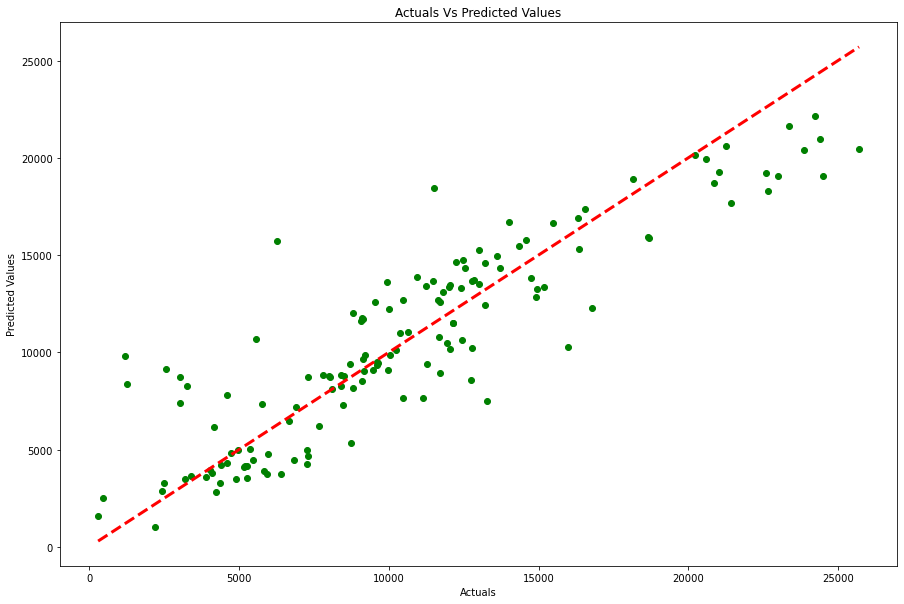

In [46]:
# Plotting Actuals Vs Predicted

plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')
# increase size

###### Notes: 
- This is not a regression line
- The closer data points are to the red line, better the model is.
- The further away the data points is the worst our prediction is

C:\Users\96653\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actuals Vs Residuals')

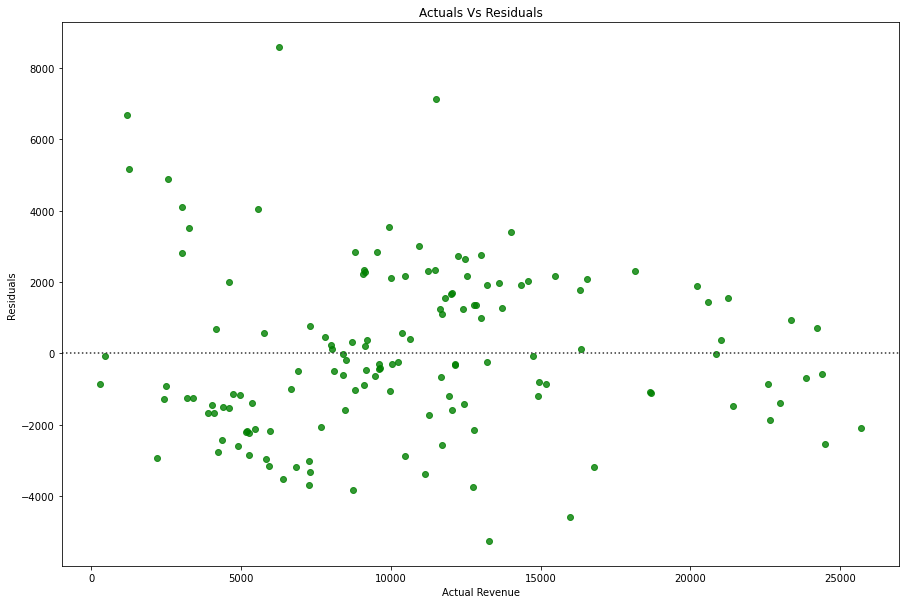

In [47]:
# Ploting Residuals

plt.figure(figsize=(15,10))

sns.residplot(y_train, y_pred, color='green')
plt.xlabel('Actual Revenue')
plt.ylabel('Residuals')
plt.title('Actuals Vs Residuals')

###### The next step should be to go back, remove more outliers and check if our model can be improved

##  How to use our L. Regression model to Make Predictions

In [48]:
# Passing Coeff into a table

Coeff = lm.coef_
Coeff.shape


(12,)

In [49]:
# We want to make it column
# Reshaping
Coeff = Coeff.reshape(-1,12)
Coeff

array([[ 9.72168996e-01,  3.69561477e+00, -4.29587654e+03,
         3.72469059e+03,  5.71185949e+02,  7.38005738e+02,
        -3.52308895e+02, -9.02241594e+02, -1.55867567e+02,
         8.14821481e+02,  1.50084913e+02, -2.92494076e+02]])

In [50]:
X2

,Visitors,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,707.0,651.375000,1,0,0,0,1,0,0,0,0,0
1,1455.0,1298.250000,0,0,1,0,0,0,0,0,1,0
2,1520.0,1559.375000,0,1,0,0,0,0,0,0,0,1
3,1726.0,1801.750000,1,0,0,0,0,0,0,1,0,0
4,2134.0,2614.500000,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
177,1400.0,1119.600000,1,0,0,0,0,0,0,0,0,1
178,2244.0,2067.888889,0,0,1,0,0,0,0,1,0,0
179,2023.0,1450.200000,1,0,0,1,0,0,0,0,0,0
180,1483.0,1121.875000,1,0,0,0,0,1,0,0,0,0


In [51]:
# Creating a Dataframe
Coeff_df = pd.DataFrame(Coeff, columns = [X2.columns])

# Displaying 
Coeff_df

,Visitors,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,0.972169,3.695615,-4295.87654,3724.69059,571.185949,738.005738,-352.308895,-902.241594,-155.867567,814.821481,150.084913,-292.494076


In [52]:
# Making Predictions                        

# Variables
Day = 'Day_Name_Friday'
Visitors = 8000
Marketing_Spend = 5000
Promo = 'Promo_Promotion Red'

# Regression Formula for pred
# y = a + bx + ..   # Where y = price, a = intercept,  b = no. of Visitors and x = coefficient of engine size

# Prediction Calculator

pred1 = (lm.intercept_) + (Coeff_df[[Day]].values[0] * 1) + Coeff_df[['Visitors']].values[0]*Visitors + Coeff_df[['Marketing Spend']].values[0]*Marketing_Spend + (Coeff_df[[Promo]].values[0]*1)

#pred1 = (lm.intercept_) + (Coeff_df[Day].values[0] * 1) + (Coeff_df['Visitors'].values[0] * Visitors) + (Coeff_df['Marketing Spend'].values[0] * Marketing_Spend) + (Coeff_df[Promo].values[0] * 1)



print('The predicted Revenue is: ', pred1)

The predicted Revenue is:  [31625.26784989]
